# 1) Set up and load data

#### 1.1 install sependancies and set up

In [1]:
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

2023-03-04 14:47:32.293614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os # use to navigate through file structures
import cv2 # import open cv library
import imghdr # Check the file extensions for particuler images.

In [3]:
data_dir = 'animal_photos_binary'

In [4]:
os.listdir(data_dir) 

['.DS_Store', 'bear', 'horse']

In [5]:
os.listdir(os.path.join(data_dir,'bear'))

['165141.jpeg',
 '80057.jpeg',
 '416476.jpeg',
 '27272.jpeg',
 '87141.jpeg',
 '322987.jpeg',
 '260896.jpeg',
 '459575.jpeg',
 '516313.jpeg',
 '460927.jpeg',
 '203546.jpeg',
 '247474.jpeg',
 '141849.jpeg',
 '514292.jpeg',
 '135572.jpeg',
 '225198.jpeg',
 '100329.jpeg',
 '441411.jpeg',
 '14504.jpeg',
 '414261.jpeg',
 '82512.jpeg',
 '239894.jpeg',
 '521236.jpeg',
 '109827.jpeg',
 '47234.jpeg',
 '473632.jpeg',
 '163105.jpeg',
 '277543.jpeg',
 '105783.jpeg',
 '87194.jpeg',
 '560281.jpeg',
 '157159.jpeg',
 '324740.jpeg',
 '85629.jpeg',
 '492723.jpeg',
 '526418.jpeg',
 '390826.jpeg',
 '322944.jpeg',
 '24560.jpeg',
 '402858.jpeg',
 '116678.jpeg',
 '42889.jpeg',
 '360263.jpeg',
 '404349.jpeg',
 '547081.jpeg',
 '200018.jpeg',
 '54300.jpeg',
 '169181.jpeg',
 '101172.jpeg',
 '265636.jpeg',
 '10766.jpeg',
 '6437.jpeg',
 '357219.jpeg',
 '218255.jpeg',
 '502.jpeg',
 '56405.jpeg',
 '44068.jpeg',
 '440522.jpeg',
 '369998.jpeg',
 '24805.jpeg',
 '83773.jpeg',
 '371782.jpeg',
 '51143.jpeg',
 '461855.jpeg'

In [6]:
img = cv2.imread(os.path.join('animal_photos','bear','104603.jpeg'))

In [8]:
len(img)

428

In [8]:
img

array([[[ 55,  98,  89],
        [ 45,  86,  78],
        [ 50,  91,  83],
        ...,
        [ 77, 158, 139],
        [ 98, 155, 146],
        [105, 155, 151]],

       [[ 57, 100,  89],
        [ 44,  86,  75],
        [ 56,  95,  87],
        ...,
        [123, 167, 168],
        [124, 159, 155],
        [134, 179, 170]],

       [[ 71, 120, 104],
        [ 60, 106,  93],
        [ 54,  97,  86],
        ...,
        [130, 164, 163],
        [105, 149, 142],
        [ 67, 142, 128]],

       ...,

       [[ 76, 145, 130],
        [108, 151, 124],
        [168, 189, 180],
        ...,
        [ 94, 127, 113],
        [ 85, 126, 128],
        [155, 197, 202]],

       [[ 77,  95, 102],
        [155, 181, 165],
        [159, 221, 209],
        ...,
        [ 86, 127, 106],
        [160, 172, 174],
        [124, 150, 156]],

       [[168, 178, 188],
        [138, 177, 186],
        [ 76, 144, 137],
        ...,
        [ 70, 124, 101],
        [143, 172, 163],
        [149, 193, 187]]

In [9]:
img.shape # check the size of the image

(428, 640, 3)

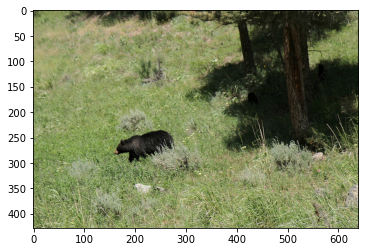

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # Show the real colours.
plt.show() # to eleminate image discription in text

#### 1.2 Remove dodgy data

#### 1.3 Load data

Build a data pipeline

In [11]:
data=tf.keras.utils.image_dataset_from_directory('animal_photos_binary')

Found 1722 files belonging to 2 classes.


2023-03-03 12:00:02.003965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# data[1] cant call sincethese data is not loaded into memory insted it is actually a generator, in the fry we want to grab the data we want.

In [14]:
tf.keras.utils.image_dataset_from_directory??

In [15]:
data_iterator = data.as_numpy_iterator() # allow us to loop through to access the data in the data pipeline

In [16]:
data_iterator

In [17]:
batch = data_iterator.next()   # access the data in the data pipeline

In [18]:
batch

(array([[[[165.50049  , 186.50049  , 203.50049  ],
          [166.5835   , 187.0835   , 204.0835   ],
          [167.50049  , 186.50049  , 203.50049  ],
          ...,
          [125.333984 , 151.33398  , 164.66699  ],
          [127.66699  , 151.1665   , 166.33203  ],
          [127.583984 , 150.58398  , 165.91602  ]],
 
         [[166.25     , 187.25     , 204.25     ],
          [166.74951  , 187.24951  , 204.24951  ],
          [168.       , 187.       , 204.       ],
          ...,
          [130.0039   , 154.0039   , 166.0039   ],
          [129.00195  , 153.00195  , 165.00195  ],
          [130.0039   , 153.75049  , 166.25195  ]],
 
         [[166.75244  , 187.75244  , 204.75244  ],
          [166.5      , 187.       , 204.       ],
          [168.66992  , 187.66992  , 204.66992  ],
          ...,
          [132.66992  , 155.33008  , 168.       ],
          [131.33984  , 154.       , 167.33984  ],
          [132.50244  , 154.50244  , 168.25488  ]],
 
         ...,
 
         [[1

In [19]:
len(batch) # batch is the list of lists stored images and labelings. 

2

In [20]:
# 2 are images and labels. Images loaded to memory from a directory as a set of numpy arrays.
# Ltes look fo the image related numpy arrays bellow.

In [21]:
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int32)

In [22]:
batch[1] # labels 1,2,3 has assigned to three different animal catogeries, we dont know which one to whcih animal.

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int32)

In [23]:
len(data) # number of batches of data in the pipeline

54

#You can try this for understanding
a = np.array([[[1,2,3],[4,5,6,]],[[1],[2]]])
a
a[0].shape
a[1].shape

In [24]:
batch[0].shape 
# 32 stes in a batch
# Since the data is stored in rank-3 tensors of shape (samples, height, width, depth)

(32, 256, 256, 3)

In [25]:
batch[1].shape  
# a batch has a 32 labels.

(32,)

In [26]:
# tf.keras.utils.image_dataset_from_directory('data', batch_size = 8, image_size = (128,128)) ; thus you can change the default parameters

Check the labels assigned to each class

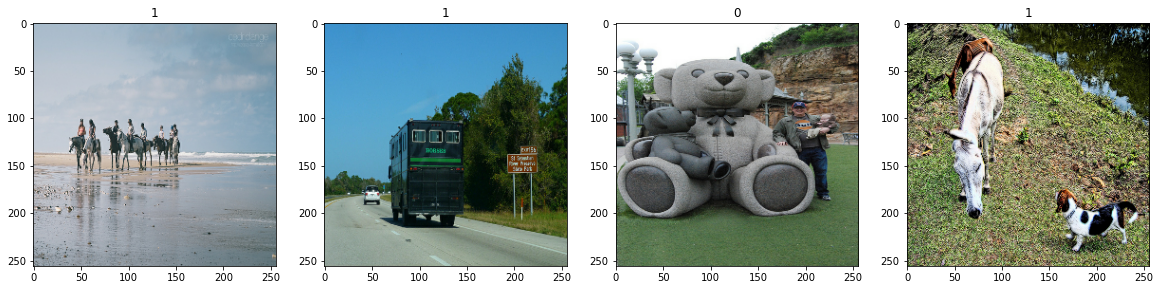

In [27]:
fig,ax= plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
# open cv - R,G,B and tensorfloor B,G,R how ever imge values between 0 to 255. lets check

In [29]:
print (f'min image resolution value is {batch[0].min()} and the maximum value is {batch[0].max()}')

min image resolution value is 0.0 and the maximum value is 255.0


# 2) Preprocess data

#### 2.1 Scale data

Scale: These values have to be get between 0 and 1 to make processing faster. to do that we have to devide it by 255

In [30]:
scaled = batch[0]/255

Though we cant do that verey time we load up a batch. Efficient way is to do that whaen we load the data to the pipeline.

In [31]:
data = data.map (lambda x, y  :(x/255, y)) # map sincronise it with data pipeline even if pipeline already been built,
# x = image
# y = label

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [32]:
data.as_numpy_iterator().next()

(array([[[[0.3779048 , 0.46383655, 0.09640012],
          [0.25305223, 0.24118221, 0.08954886],
          [0.20057636, 0.1672143 , 0.05536535],
          ...,
          [0.28484604, 0.40163717, 0.03668428],
          [0.29158434, 0.37438533, 0.0415288 ],
          [0.29030904, 0.34565908, 0.0322955 ]],
 
         [[0.5726773 , 0.6686887 , 0.20256779],
          [0.48799977, 0.5259574 , 0.07076057],
          [0.46068284, 0.45847312, 0.19671415],
          ...,
          [0.39620674, 0.456317  , 0.08076937],
          [0.37322304, 0.42038718, 0.02171224],
          [0.36149663, 0.37538487, 0.05382583]],
 
         [[0.5473537 , 0.643974  , 0.16068858],
          [0.46759152, 0.50744486, 0.08565219],
          [0.51599646, 0.55355394, 0.18084598],
          ...,
          [0.34105775, 0.43390778, 0.06081687],
          [0.3074774 , 0.36948913, 0.04913067],
          [0.18155828, 0.22263901, 0.02934857]],
 
         ...,
 
         [[0.81319124, 0.7745098 , 0.64184666],
          [0.64409

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

In [35]:
print (f'min image resolution value is {batch[0].min()} and the maximum value is {batch[0].max()}')

min image resolution value is 0.0 and the maximum value is 1.0


#### some times you get very low values for max. the problem would be int. thus it can be changed as follows:
fig,ax= plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

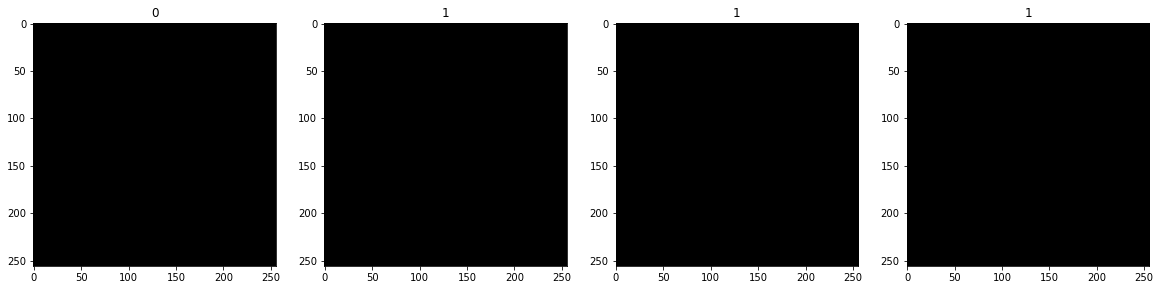

In [36]:
fig,ax= plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
# the reason for above black boxes are : astype(int)) since after devide by 250 it cannot be still be int. Hence,

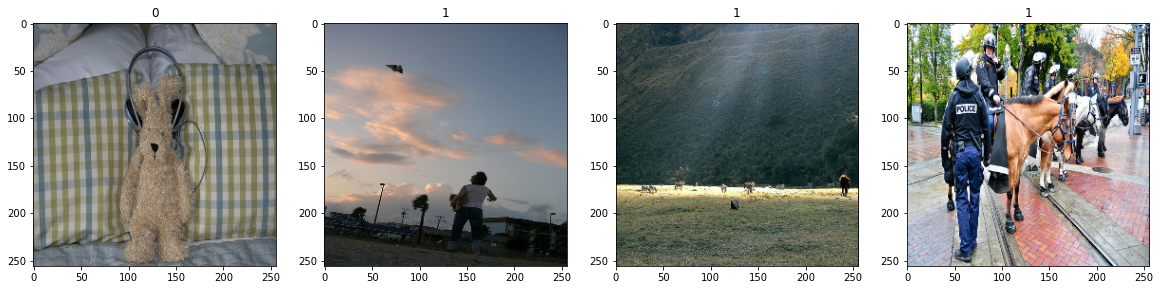

In [38]:
fig,ax= plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split data, Training, Validation, testing.

In [39]:
len(data)

54

In [40]:
train_size = int(int(len(data)*.65))
val_size = int(len(data)*.15)+1 # added 1 later after realising the total is 75.
test_size = int(len(data)*.2)

In [41]:
print(f' {train_size}  , {val_size} , {test_size}  ')

 35  , 9 , 10  


In [42]:
train_size+val_size +test_size

54

In [43]:
train = data.take (train_size)                           # partitioning data for train
val = data.skip(train_size).take(val_size)               # partitioning data for val
test = data.skip(train_size + val_size).take(test_size)  # # partitioning data for test

#### Our data alreay been shuffled. If not it has too be done before partitioning into train, val and teat

In [44]:
len(test)

10

#  3) Deep model

####  3.1 Build deep learning model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
MaxPooling2D??

##### What are the properties of default max pooling. you can see pool size (2,2). Which it is going to add max values to a 2x2 region. means it devides lengh and width of the input by 2 and 2.
    

In [47]:
model = Sequential()

In [48]:
# Three convolutional layers
# first layer has to have a input or has to have a seperate input layer

model.add (Conv2D ( 16, (3,3) , 1 , activation = 'relu' , input_shape = (256,256,3)))
model.add (MaxPooling2D())

model.add (Conv2D ( 32, (3,3) , 1 , activation = 'relu' ))
model.add (MaxPooling2D())

model.add (Conv2D ( 16, (3,3) , 1 , activation = 'relu' ))
model.add (MaxPooling2D())

# One flatten layer
model.add (Flatten())

# Two dense layers
model.add (Dense ( 256, activation = 'relu'))
model.add (Dense (1 , activation = 'sigmoid')) 
# sigmoid if output is binary, soft max for multi class
#  ValueError: `logits` and `labels` must have the same shape, received ((None, 3) vs (None, 1)). This is the error 
# duce to wrong number of nodes in the out put layer. I put 3 instead of 1.


In [49]:
model.compile('adam', loss= 'BinaryCrossentropy', metrics=['accuracy'])
# for softmax loss function : loss = 'sparse_categorical_crossentropy', 
# for sigmoid it is tf.losses.BinaryCrossentropy() or 'BinaryCrossentropy'

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 3.2 Train

In [167]:
logdir = 'logs_binary'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard( log_dir = 'logdir') 
# very important if you want to save your model in a perticuler check point,
# If you want specific login
# Then your tensor board logs logsout

In [53]:
hist_p = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
35/35 [==============================] - 49s 1s/step - loss: 0.7067 - accuracy: 0.5857 - val_loss: 0.6325 - val_accuracy: 0.6736
Epoch 2/20
35/35 [==============================] - 50s 1s/step - loss: 0.6137 - accuracy: 0.6571 - val_loss: 0.5912 - val_accuracy: 0.6910
Epoch 3/20
35/35 [==============================] - 53s 1s/step - loss: 0.5507 - accuracy: 0.7161 - val_loss: 0.5734 - val_accuracy: 0.7222
Epoch 4/20
35/35 [==============================] - 56s 2s/step - loss: 0.4977 - accuracy: 0.7688 - val_loss: 0.6228 - val_accuracy: 0.7014
Epoch 5/20
35/35 [==============================] - 57s 2s/step - loss: 0.4266 - accuracy: 0.8161 - val_loss: 0.5097 - val_accuracy: 0.7639
Epoch 6/20
35/35 [==============================] - 52s 1s/step - loss: 0.3156 - accuracy: 0.8634 - val_loss: 0.6304 - val_accuracy: 0.7465
Epoch 7/20
35/35 [==============================] - 52s 1s/step - loss: 0.2319 - accuracy: 0.9170 - val_loss: 0.5169 - val_accuracy: 0.7951
Epoch 8/20
35/35 [==

In [54]:
hist_p

In [55]:
hist_p.history

{'loss': [0.7066944241523743,
  0.6136729717254639,
  0.5507152676582336,
  0.4977310597896576,
  0.4266015887260437,
  0.315626859664917,
  0.23185855150222778,
  0.1901806890964508,
  0.13348406553268433,
  0.09469775855541229,
  0.09264401346445084,
  0.05970491096377373,
  0.03570326045155525,
  0.015464912168681622,
  0.007783604320138693,
  0.01756068877875805,
  0.029220132157206535,
  0.018732227385044098,
  0.01587080955505371,
  0.024275673553347588],
 'accuracy': [0.5857142806053162,
  0.6571428775787354,
  0.7160714268684387,
  0.768750011920929,
  0.8160714507102966,
  0.8633928298950195,
  0.9169642925262451,
  0.9285714030265808,
  0.9571428298950195,
  0.9714285731315613,
  0.9750000238418579,
  0.981249988079071,
  0.9919642806053162,
  0.9991071224212646,
  0.9982143044471741,
  0.9973214268684387,
  0.9928571581840515,
  0.9928571581840515,
  0.9964285492897034,
  0.9928571581840515],
 'val_loss': [0.6325252056121826,
  0.5911773443222046,
  0.5734144449234009,
  0.6

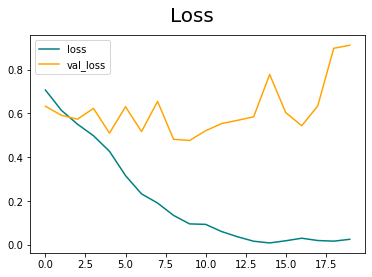

In [56]:
fig = plt.figure()
plt.plot(hist_p.history['loss'], color='teal', label='loss')
plt.plot(hist_p.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

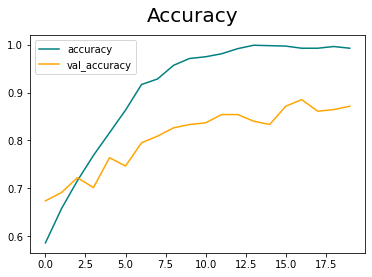

In [57]:
fig = plt.figure()
plt.plot(hist_p.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_p.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [59]:
# fromgraph :  around 10 epoches will be good.

# 4) Evaluate performance

4.1 Evauate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch                       # Unpack - X = images, y = y true value
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 246ms/step


In [63]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.7599999904632568, Recall:0.8351648449897766, Accuracy:0.7515923380851746


# 4.2 Test

#### Lets check the bear image first

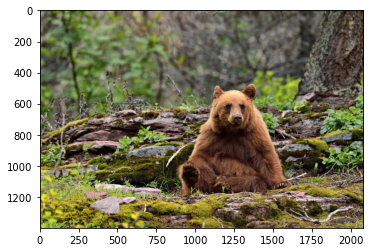

In [92]:
img_bear = cv2.imread('check_bear.jpeg')
plt.imshow(cv2.cvtColor(img_bear,cv2.COLOR_BGR2RGB)) # Show the real colours.
plt.show() # to eleminate image discription in text

In [70]:
# See the size, 1400 x 2000 pixels. we need 256 x 256 to pass it to pipeline.

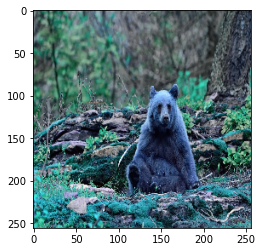

In [75]:
resize = tf.image.resize(img_bear, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

#### Though neural network expect us to pass a batch of images not a single image.
#### Therefore we need to encapsulate inside of another set of pranthasis or arrays or put insid of a list
#### To do that pass the image through np.expand_dims(resize,0) here 0 is passing an extra dimension. apply it above cell

In [81]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 78.015625 ,  90.13672  ,  88.13672  ],
        [ 72.06273  ,  86.06273  ,  85.06273  ],
        [ 85.47554  , 103.0107   , 102.0107   ],
        ...,
        [ 47.256886 ,  70.559616 ,  90.79204  ],
        [ 45.25586  ,  60.791016 ,  83.791016 ],
        [ 15.850761 ,  25.850761 ,  43.85076  ]],

       [[ 97.48633  , 110.40106  , 109.74414  ],
        [106.865234 , 121.865234 , 124.76886  ],
        [113.18359  , 128.1836   , 130.88086  ],
        ...,
        [ 10.665188 ,  21.270657 ,  39.270657 ],
        [  2.0761719,   9.282528 ,  30.190731 ],
        [ 26.53125  ,  33.53125  ,  52.53125  ]],

       [[122.60742  , 134.60742  , 138.60742  ],
        [128.21371  , 143.21371  , 146.21371  ],
        [126.22607  , 139.72192  , 147.55664  ],
        ...,
        [ 33.729244 ,  40.729244 ,  57.729244 ],
        [ 25.59097  ,  33.077297 ,  51.915188 ],
        [ 36.368214 ,  46.85454  ,  63.692432 ]],

       ...,

     

In [84]:
np.expand_dims(resize,0) # ithas an extra set of pranthasis compared to above

array([[[[ 78.015625 ,  90.13672  ,  88.13672  ],
         [ 72.06273  ,  86.06273  ,  85.06273  ],
         [ 85.47554  , 103.0107   , 102.0107   ],
         ...,
         [ 47.256886 ,  70.559616 ,  90.79204  ],
         [ 45.25586  ,  60.791016 ,  83.791016 ],
         [ 15.850761 ,  25.850761 ,  43.85076  ]],

        [[ 97.48633  , 110.40106  , 109.74414  ],
         [106.865234 , 121.865234 , 124.76886  ],
         [113.18359  , 128.1836   , 130.88086  ],
         ...,
         [ 10.665188 ,  21.270657 ,  39.270657 ],
         [  2.0761719,   9.282528 ,  30.190731 ],
         [ 26.53125  ,  33.53125  ,  52.53125  ]],

        [[122.60742  , 134.60742  , 138.60742  ],
         [128.21371  , 143.21371  , 146.21371  ],
         [126.22607  , 139.72192  , 147.55664  ],
         ...,
         [ 33.729244 ,  40.729244 ,  57.729244 ],
         [ 25.59097  ,  33.077297 ,  51.915188 ],
         [ 36.368214 ,  46.85454  ,  63.692432 ]],

        ...,

        [[ 30.848682 , 165.60445  , 16

In [88]:
resize.shape

TensorShape([256, 256, 3])

In [89]:
np.expand_dims(resize,0).shape 
# compare with above, this has wrapped with another set of arrays

(1, 256, 256, 3)

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # pass the image to neural network. 

1/1 [==============================] - 0s 62ms/step


In [103]:
yhat
# almost 0. 0 represents bear. Done!

array([[0.11941817]], dtype=float32)

####  Lets check the horse image now

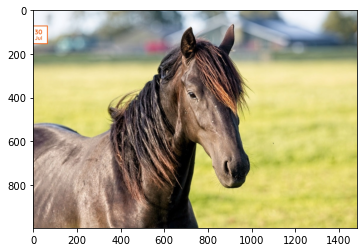

In [107]:
img_horse = cv2.imread('check_horse.jpg')
plt.imshow(cv2.cvtColor(img_horse,cv2.COLOR_BGR2RGB)) # Show the real colours.
plt.show()

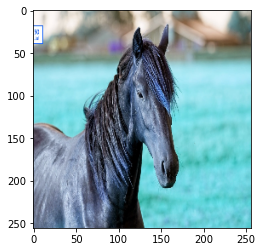

In [112]:
resize = tf.image.resize(img_horse, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
np.expand_dims(resize,0) 

array([[[[251.89453 , 247.44727 , 246.44727 ],
         [252.3418  , 247.89453 , 246.89453 ],
         [252.3418  , 247.89453 , 246.89453 ],
         ...,
         [195.      , 194.44922 , 189.54991 ],
         [198.9043  , 195.99428 , 191.16588 ],
         [192.20581 , 191.51624 , 185.82092 ]],

        [[252.      , 247.      , 244.      ],
         [253.      , 248.      , 245.      ],
         [253.      , 248.      , 245.      ],
         ...,
         [196.31708 , 195.31708 , 185.31708 ],
         [197.45703 , 196.79883 , 186.11523 ],
         [192.80078 , 192.14258 , 181.45898 ]],

        [[252.52734 , 246.      , 243.      ],
         [254.52734 , 248.      , 245.      ],
         [254.52734 , 248.      , 245.      ],
         ...,
         [192.00046 , 189.29147 , 179.5278  ],
         [191.52734 , 189.52734 , 179.52734 ],
         [190.25868 , 189.16406 , 179.16406 ]],

        ...,

        [[ 92.77128 , 106.77128 , 129.77127 ],
         [111.6582  , 123.6582  , 151.6582  ]

In [114]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [115]:
yhat
# almost 1. 1 represents horse. Done!

array([[0.99807835]], dtype=float32)

#### Model works

If requires can write python code to give the yhat answer as a horse or a bear using <> .5 logic

# 5) save model

####  5.1 save model

In [119]:
from tensorflow.keras.models import load_model

In [120]:
model.save(os.path.join('models','bear_horse.h5'))

In [123]:
os.path.join('models','bear_horse.h5')

'models/bear_horse.h5'

In [124]:
new_model = load_model(os.path.join('models','bear_horse.h5'))

In [125]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 169ms/step


array([[0.99807835]], dtype=float32)

In [126]:
new_model